### Sephora Analysis

In [3]:
import numpy as np
import pandas as pd 

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy import stats
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')
sns.set(font_scale = 1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

color= "Spectral"
color_plt = ListedColormap(sns.color_palette(color).as_hex())
color_hist = 'teal'

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

In [6]:
df= pd.read_csv(r'C:/Users/Sachin/Downloads/sephora_website_dataset.csv')

In [6]:
df.head(2)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0


In [7]:
df.shape

(9168, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168 non-null   

# 1.	Data cleaning 

Visualization of the missing data 

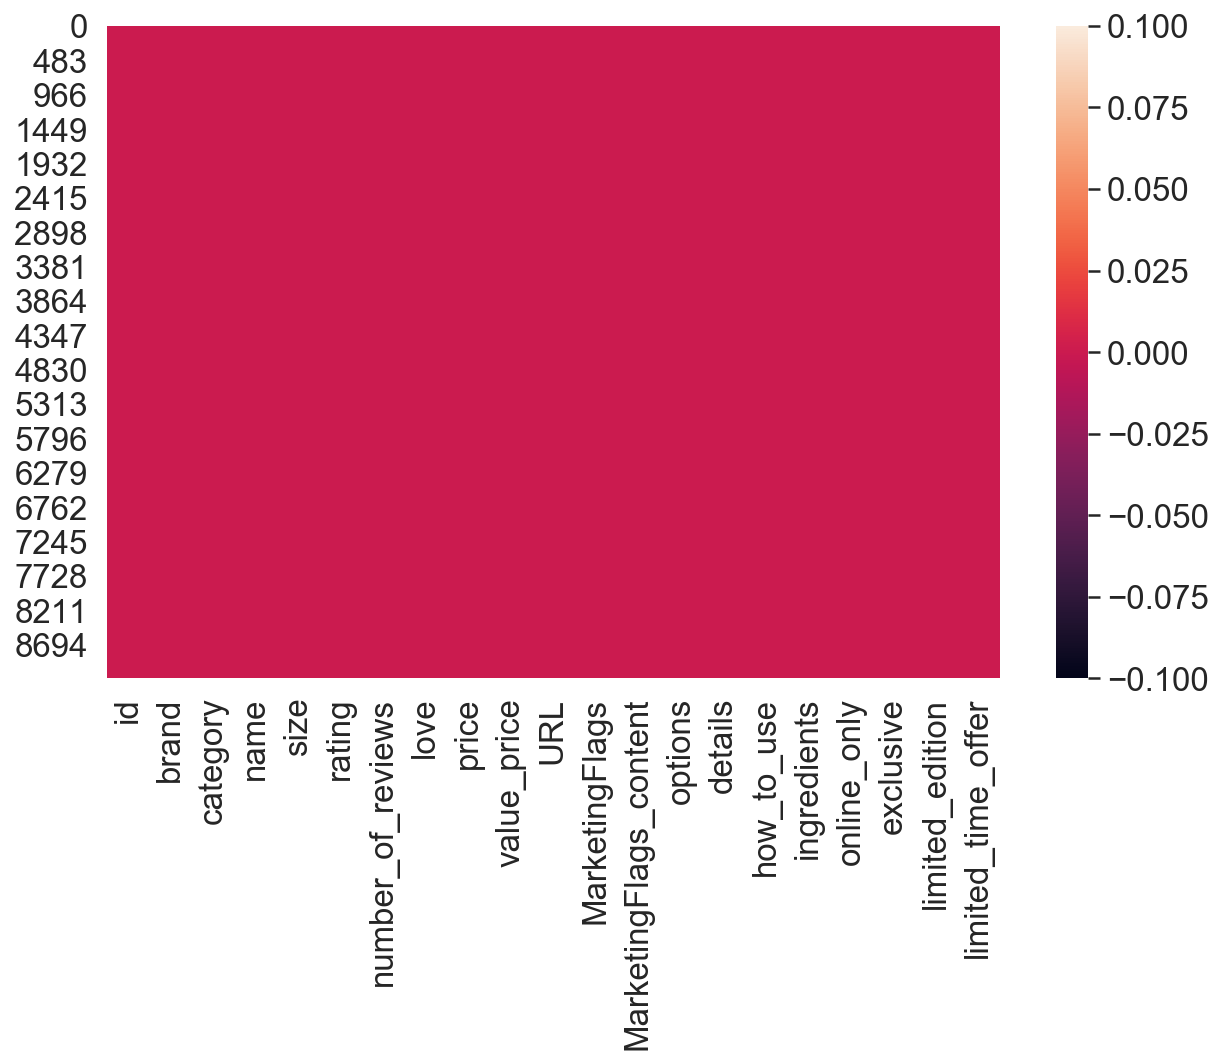

In [9]:
plt.figure(figsize = (10, 6))
sns.heatmap(data = df.isnull())

Converting the categorical column to numeric

In [7]:
label_encoder = LabelEncoder()
df1 = df.copy()
df1['Numeric_category'] = label_encoder.fit_transform(df1['category'])

In [32]:
df1

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,Numeric_category
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0,71
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0,28
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0,119
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0,119
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9163,2208502,SEPHORA COLLECTION,Face Masks,The Rose Gold Mask,no size,2.0,15,6200,6.0,6.0,...,limited edition · exclusive,no options,What it is: A limited-edition- nurturing and h...,Suggested Usage:-Unfold the mask.-Apply the ma...,-Rose Quartz Extract: Hydrates dry skin. Aqua...,0,1,1,0,55
9164,2298909,SEPHORA COLLECTION,Lip Sets,Give Me Some Sugar Colorful Gloss Balm Set,3 x 0.32 oz/ 9 g,0.0,0,266,15.0,27.0,...,exclusive,no options,What it is: A set of three bestselling Colorfu...,Suggested Usage:-Apply directly to lips using ...,Colorful Gloss Balm Wanderlust: Hydrogenated P...,0,1,0,0,99
9165,2236750,SEPHORA COLLECTION,Tinted Moisturizer,Weekend Warrior Tone Up Cream,0.946 oz/ 28 mL,0.0,0,445,16.0,16.0,...,exclusive,no options,What it is: A weightless complexion booster- i...,Suggested Usage:-Use this product as the last ...,Aqua (Water)- Dimethicone- Isohexadecane- Poly...,0,1,0,0,137
9166,50,SEPHORA COLLECTION,no category,Gift Card,no size,5.0,46,0,50.0,50.0,...,0,no options,What it is:- Available in denominations of $10...,no instructions,unknown,0,0,0,0,142


Handling Duplications

In [10]:
df.duplicated().sum()

0

In [11]:
df=df.drop_duplicates()

In [12]:
df.isnull().mean().sort_values(ascending=True)

id                        0.0
exclusive                 0.0
online_only               0.0
ingredients               0.0
how_to_use                0.0
details                   0.0
options                   0.0
MarketingFlags_content    0.0
MarketingFlags            0.0
limited_edition           0.0
URL                       0.0
price                     0.0
love                      0.0
number_of_reviews         0.0
rating                    0.0
size                      0.0
name                      0.0
category                  0.0
brand                     0.0
value_price               0.0
limited_time_offer        0.0
dtype: float64

# 2. Exploratory data analysis 

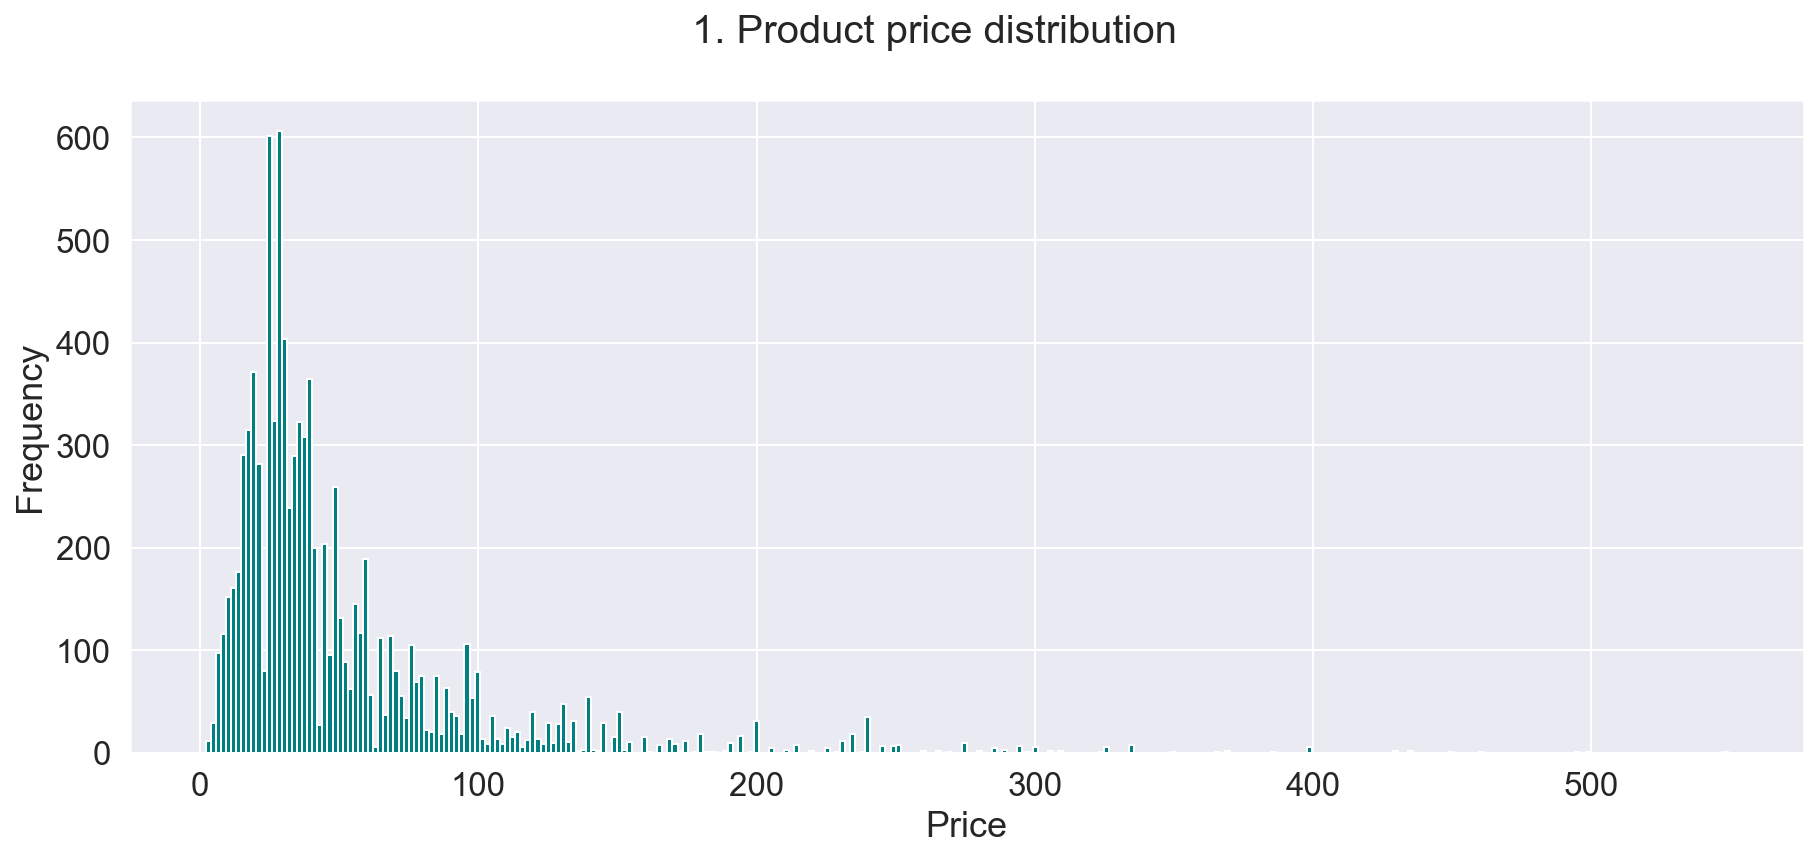

In [16]:
fig, ax = plt.subplots( figsize=(15, 6))
ax.hist(df['price'], bins = 300, color = color_hist)

ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
fig.suptitle('1. Product price distribution ', fontsize = 20)

ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

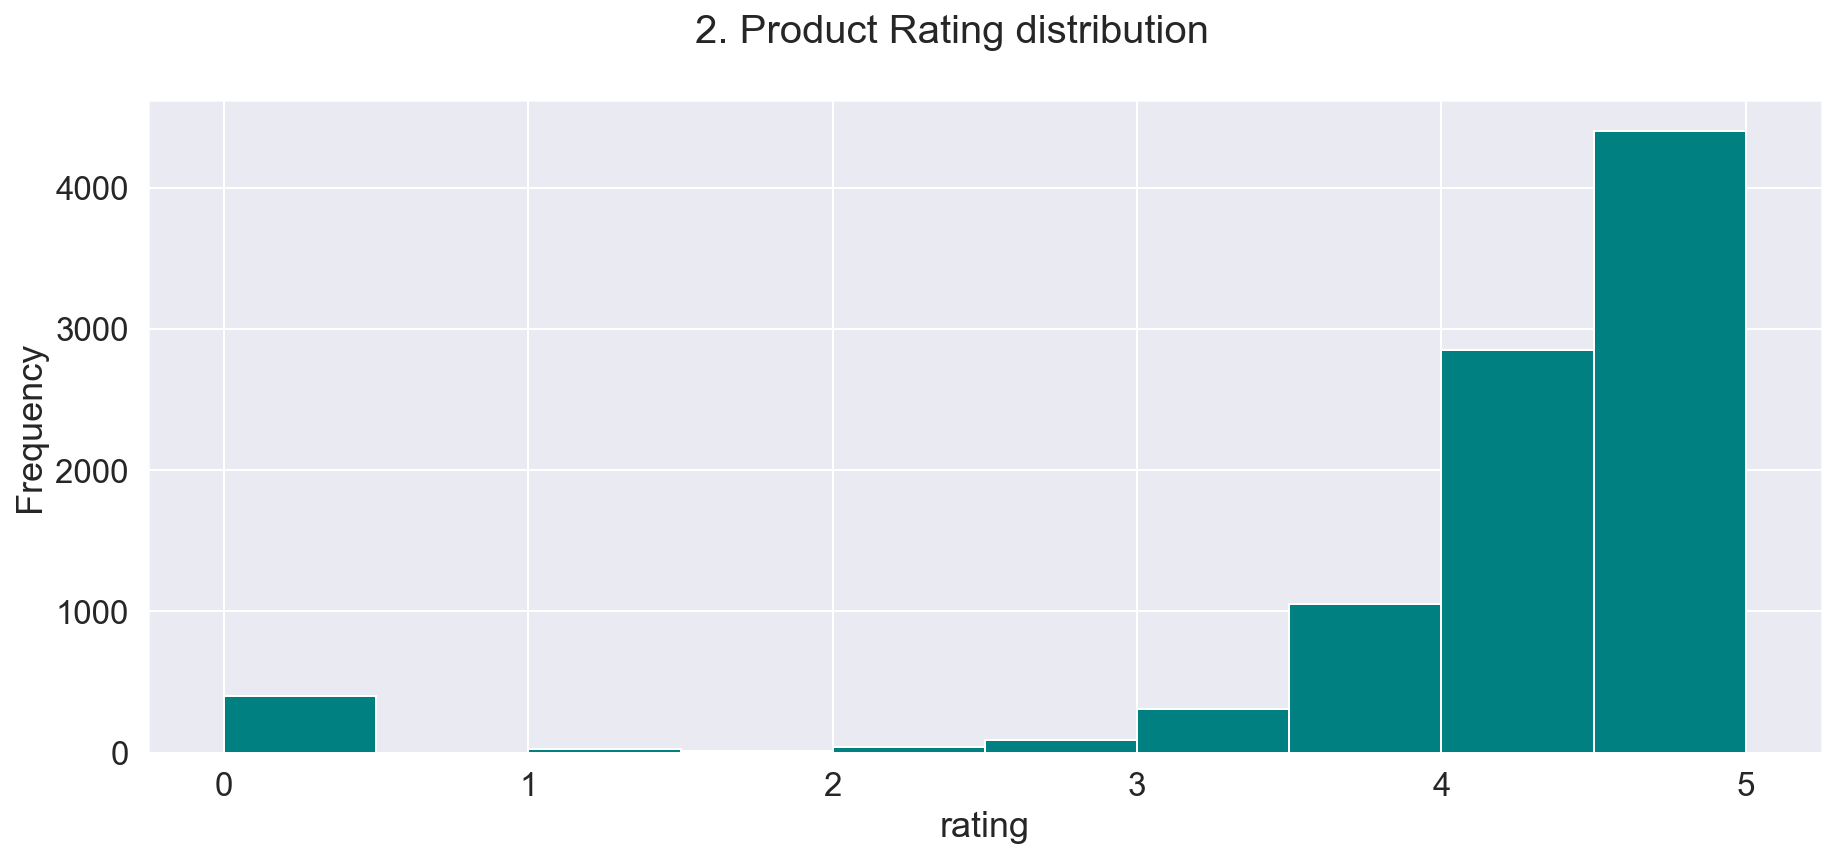

In [18]:
fig, ax = plt.subplots( figsize=(15, 6))
ax.hist(df['rating'], color = color_hist)

ax.set_xlabel('rating')
ax.set_ylabel('Frequency')
fig.suptitle('2. Product Rating distribution ', fontsize = 20)

plt.show()

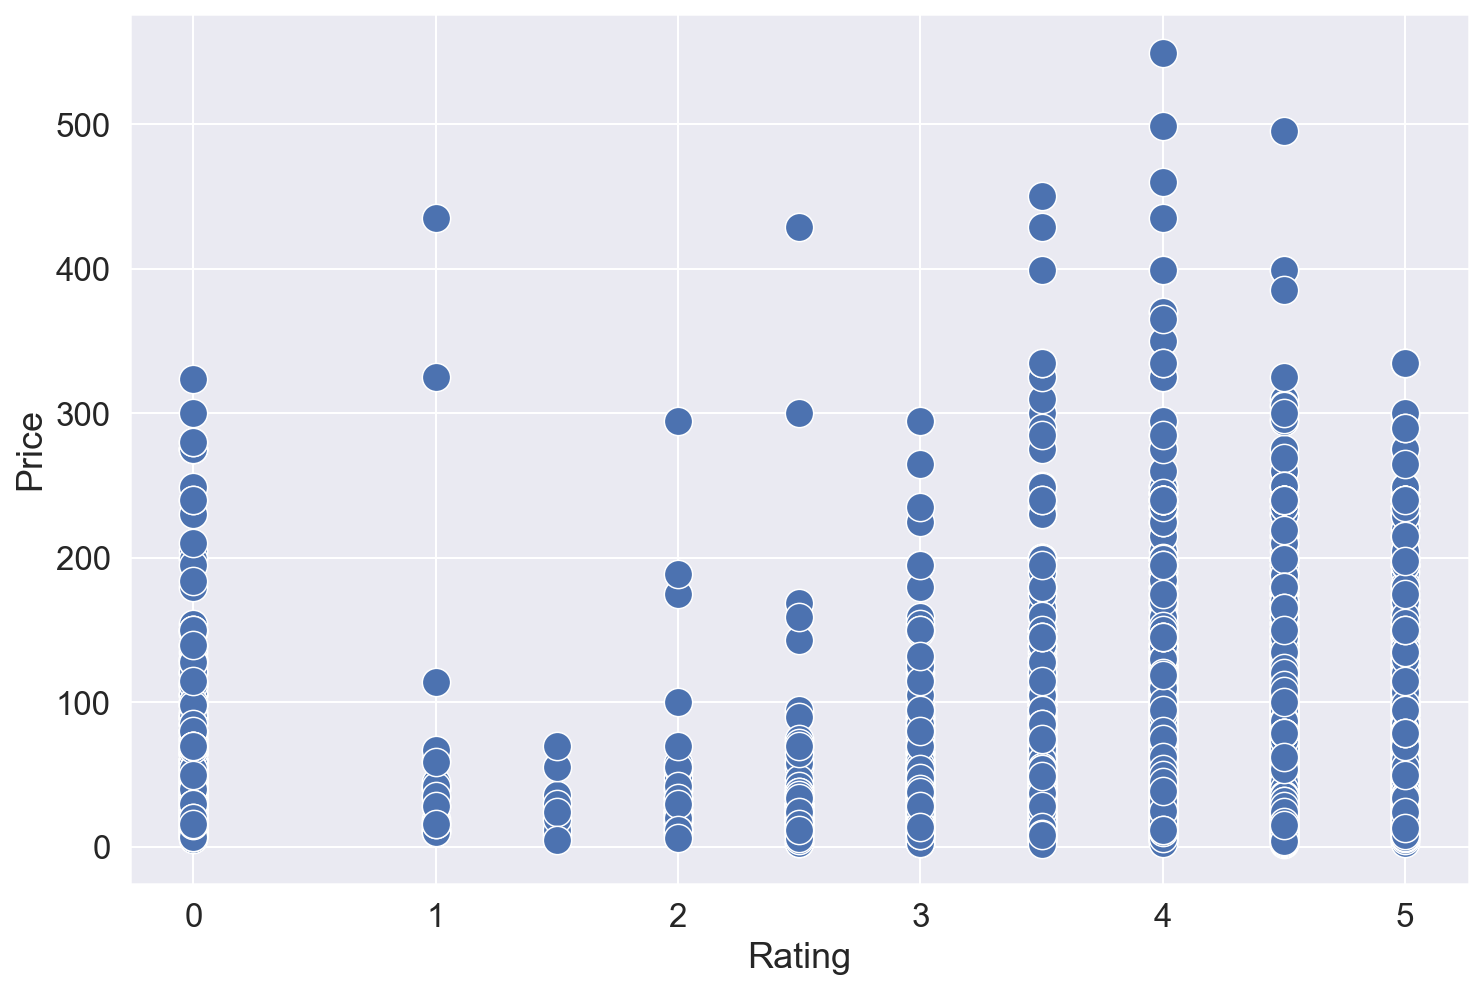

In [21]:
ig, ax = plt.subplots( figsize = (12, 8))
ax = sns.scatterplot(x = 'rating', 
                     y = 'price', 
                     data = df, 
                     marker = 'o', s = 200, palette = color)

ax.set_ylabel('Price')
ax.set_xlabel('Rating')
fig.suptitle('3. Product Rating vs Price', fontsize = 20)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

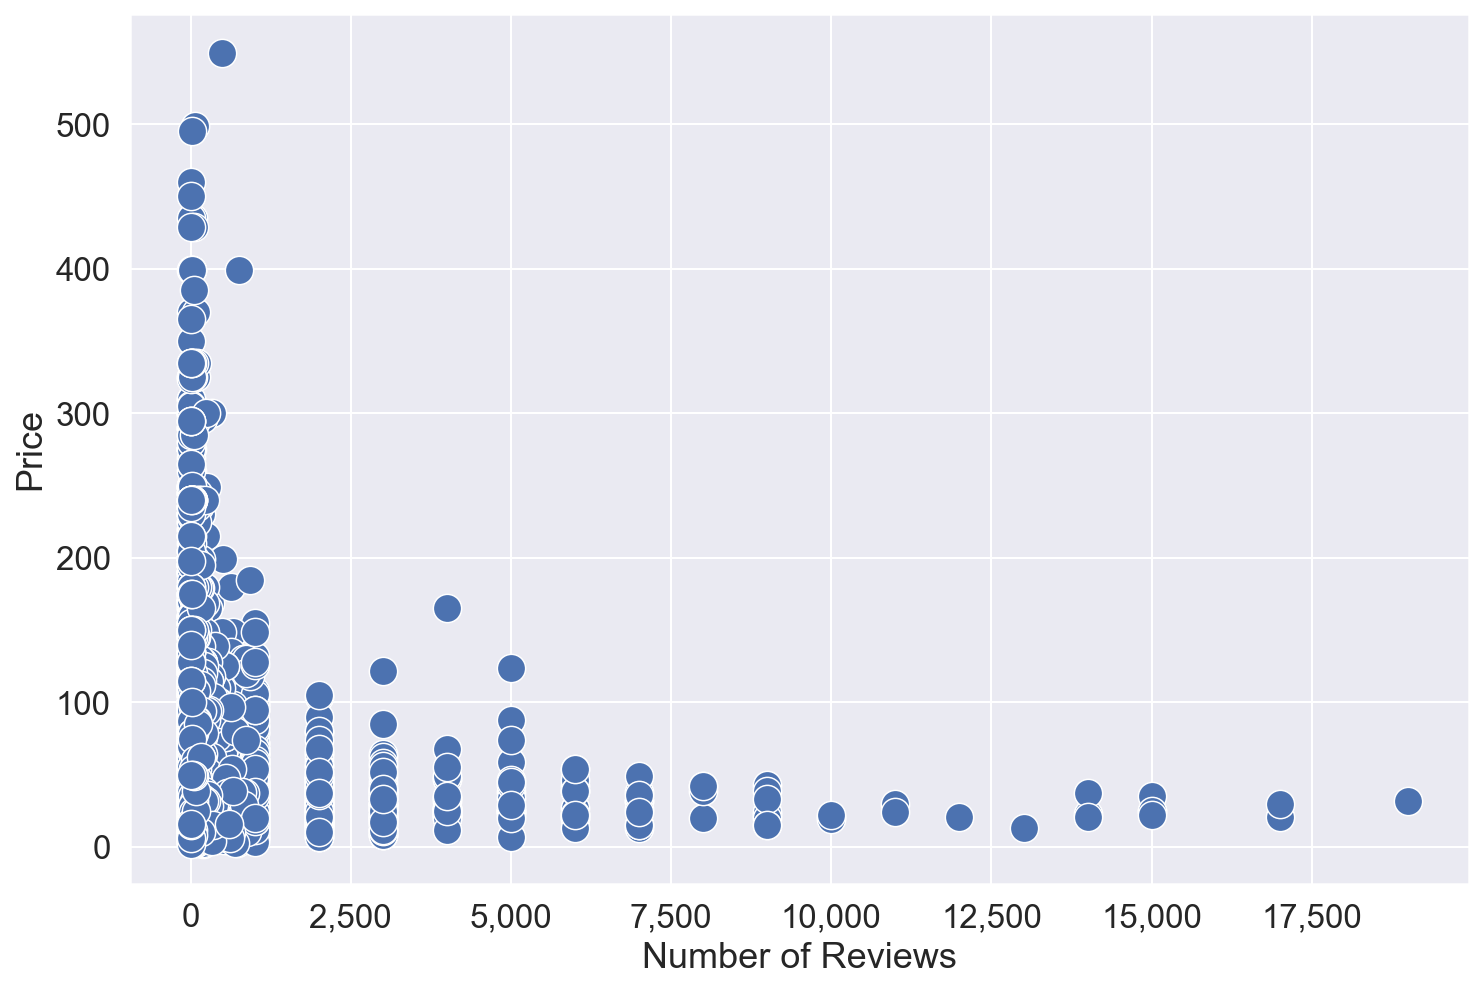

In [22]:
ig, ax = plt.subplots( figsize = (12, 8))
ax = sns.scatterplot(x = 'number_of_reviews', 
                     y = 'price', 
                     data = df, 
                     marker = 'o', s = 200, palette = color)

ax.set_ylabel('Price')
ax.set_xlabel('Number of Reviews')
fig.suptitle('4. Number of reviews for product vs Price', fontsize = 20)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

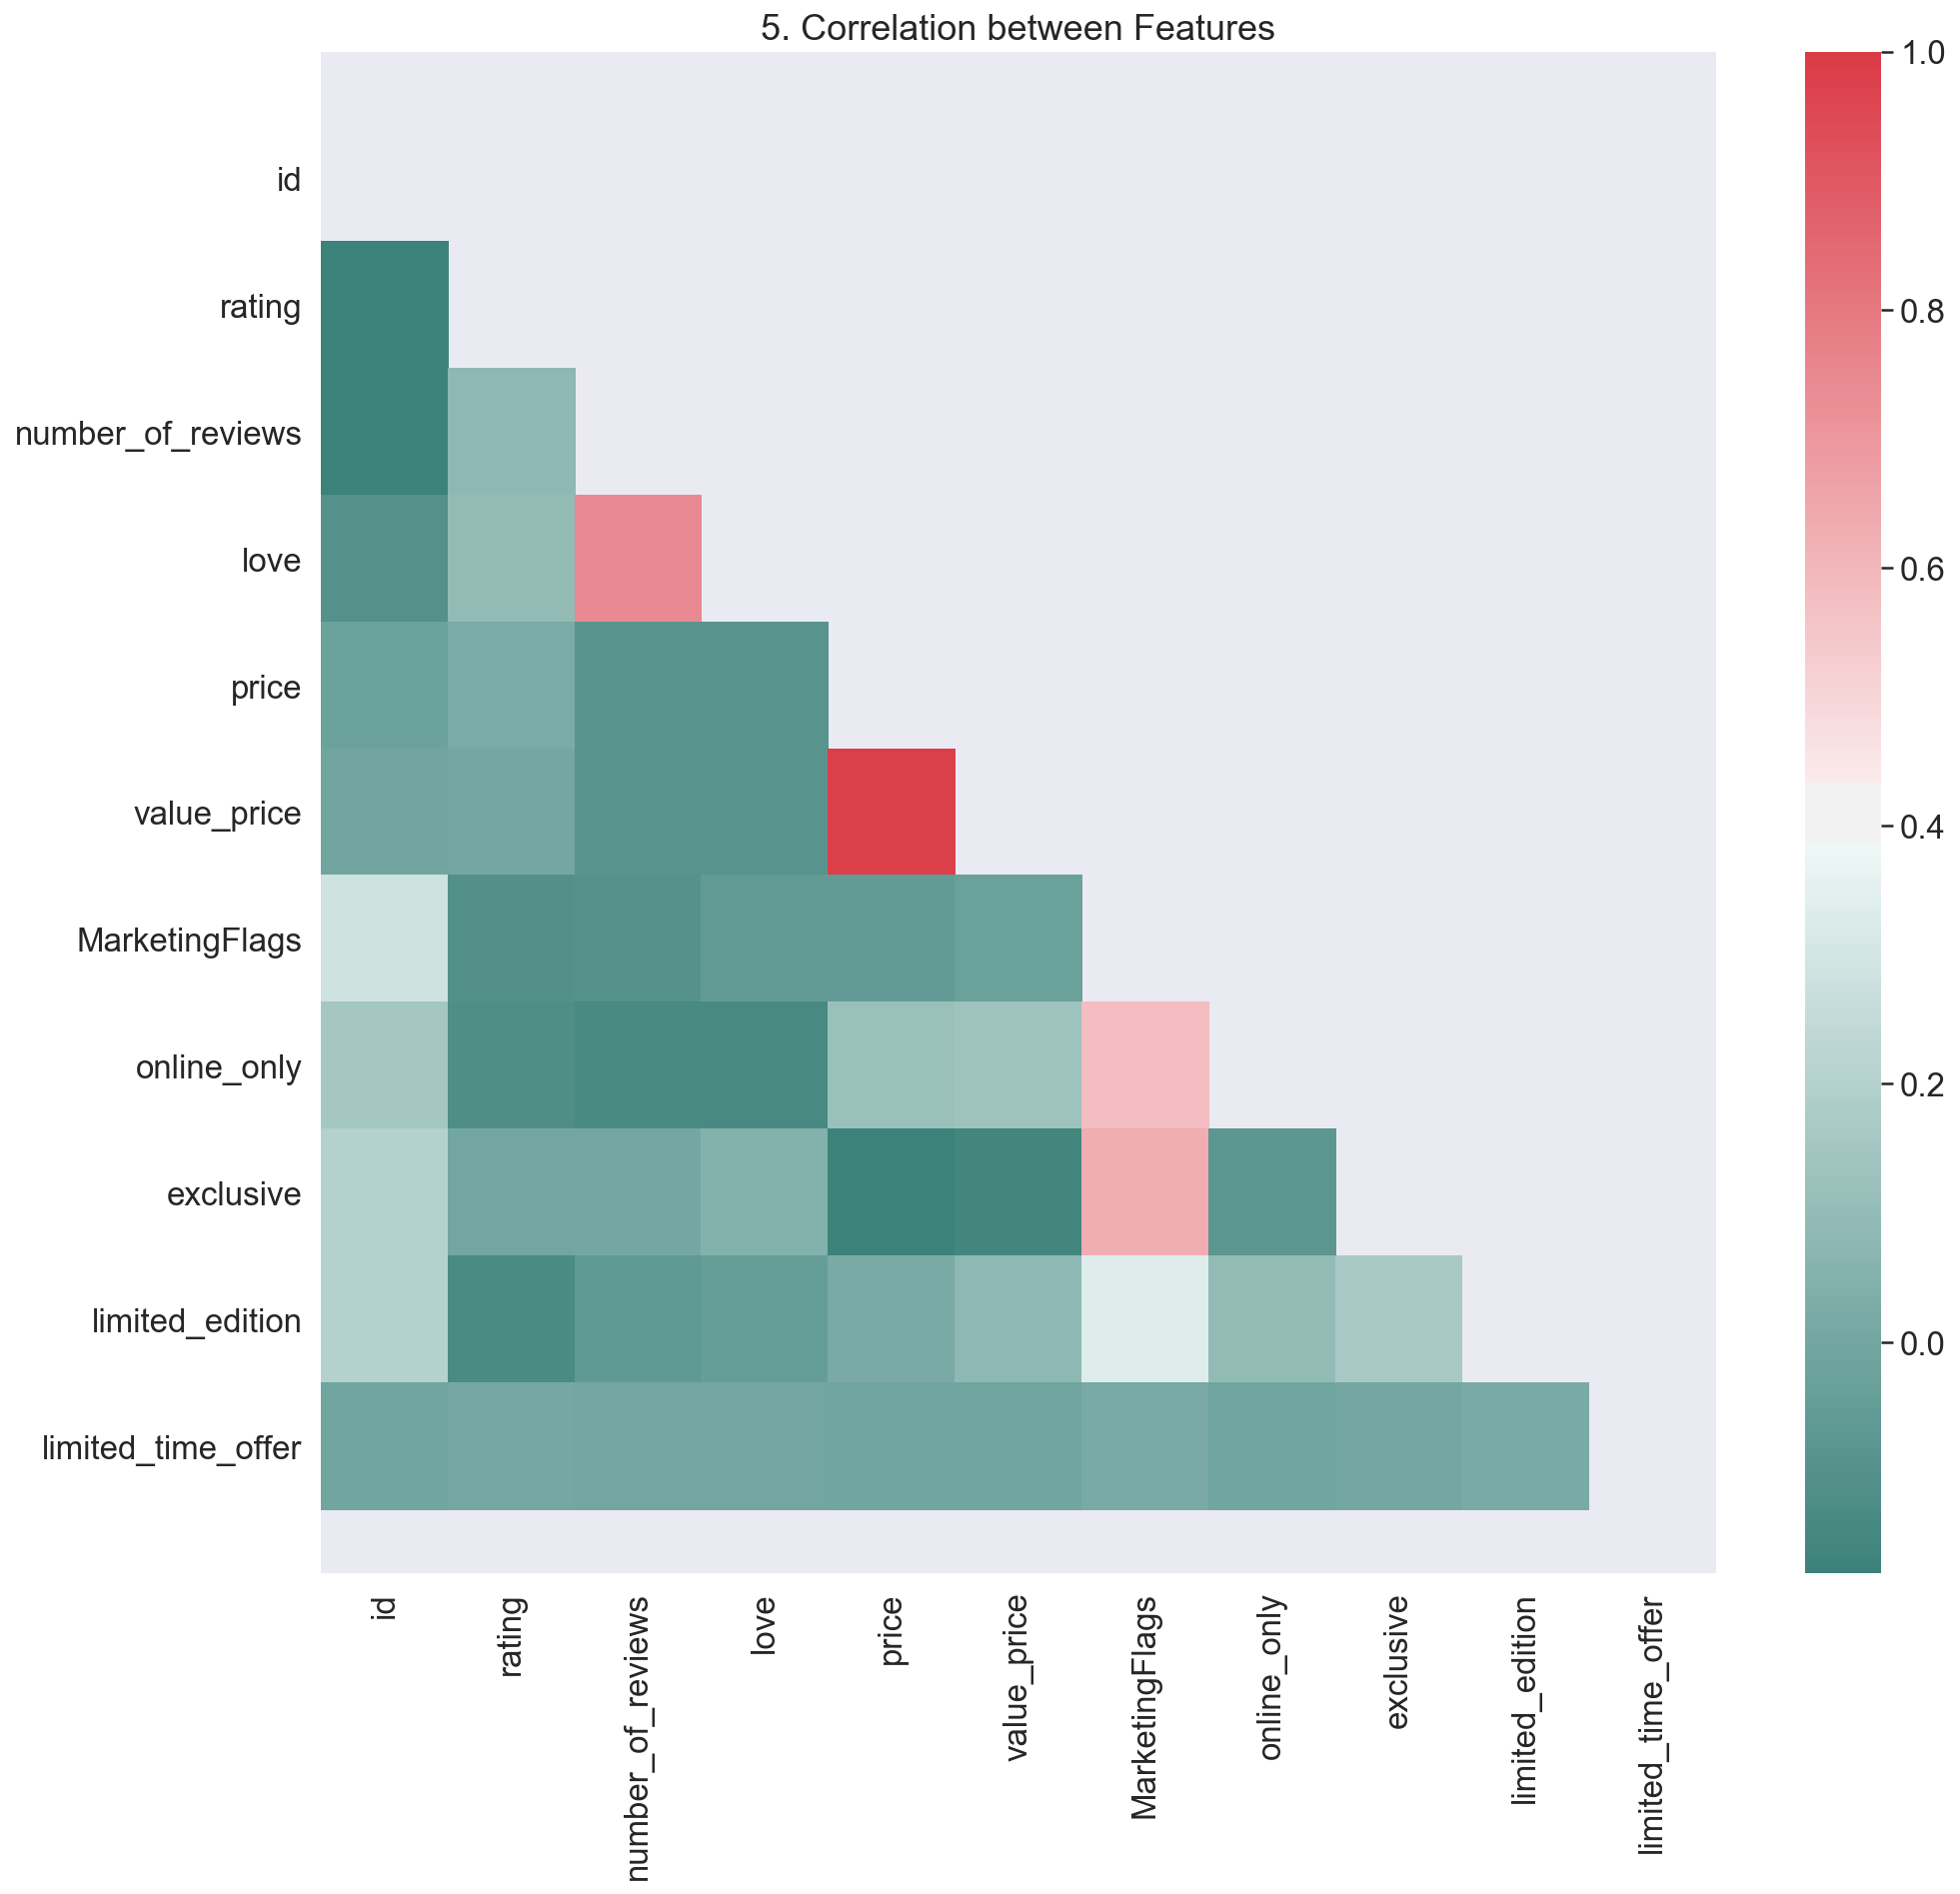

In [23]:
fig, axs = plt.subplots(figsize = (16, 14)) 
mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))
g = sns.heatmap(df.corr(), ax = axs, mask=mask, cmap = sns.diverging_palette(180, 10, as_cmap = True), square = True)

plt.title('5. Correlation between Features')

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [24]:
df.describe()

,id,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
count,9.168000e+03,9168.000000,9168.000000,9.168000e+03,9168.000000,9168.00000,9168.000000,9168.000000,9168.000000,9168.000000
mean,1.962952e+06,3.990020,282.139180,1.627859e+04,50.063237,51.82359,0.234839,0.264725,0.091841,0.000327
std,3.859714e+05,1.007707,890.642028,4.260651e+04,47.164989,49.45902,0.423921,0.441211,0.288817,0.018087
min,5.000000e+01,0.000000,0.000000,0.000000e+00,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000
25%,1.819453e+06,4.000000,10.000000,1.600000e+03,24.000000,25.00000,0.000000,0.000000,0.000000,0.000000
50%,2.072354e+06,4.000000,46.000000,4.800000e+03,35.000000,35.00000,0.000000,0.000000,0.000000,0.000000
75%,2.230591e+06,4.500000,210.000000,1.380000e+04,59.000000,60.00000,0.000000,1.000000,0.000000,0.000000
max,2.359685e+06,5.000000,19000.000000,1.300000e+06,549.000000,549.00000,1.000000,1.000000,1.000000,1.000000


In [25]:
df.corr()['price'].sort_values(ascending = False)

price                 1.000000
value_price           0.983357
online_only           0.117250
rating                0.019559
limited_edition       0.015333
limited_time_offer   -0.009679
id                   -0.026661
MarketingFlags       -0.056920
number_of_reviews    -0.084001
love                 -0.088724
exclusive            -0.178809
Name: price, dtype: float64

In [28]:
numeric_feats = df.dtypes[df.dtypes != "object"].index

skewed_feats = df[numeric_feats.tolist()].apply(lambda x:stats.skew(x.dropna())).sort_values(ascending = False)
print("\nBelow is the skewness in numerical features in dataset: \n")
skewness = pd.DataFrame({'Skew':skewed_feats})
skewness.head()


Below is the skewness in numerical features in dataset: 



,Skew
limited_time_offer,55.253962
number_of_reviews,9.784112
love,9.704153
price,3.172289
value_price,3.142461


# 3.	Model Implementation, Evaluation and Testing 

Model used is Decision Tree

In [8]:
# We are classifying categorical variable `category` as numerical 
label_encoder = LabelEncoder()
df1 = df.copy()
df1['Numeric_category'] = label_encoder.fit_transform(df1['category'])

In [9]:
#remove the unnecessary columns and using just the columns: rating, number of reviews, love and price for analysis
X = df1.drop(['id', 'brand','category','name','size','value_price','URL','MarketingFlags','MarketingFlags_content','options',
              'details','how_to_use','ingredients','online_only','exclusive','limited_edition','limited_time_offer',
              'Numeric_category'], axis = 1)
Y_numeric = df1['Numeric_category']
Y_catagorical = df1['category']

In [10]:
#Splitting for training data and for testing data. we will use 60% data for training and 40% for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y_numeric, test_size = 0.4, random_state=42)

In [11]:
X_train.shape

(5500, 4)

In [12]:
X_test.shape

(3668, 4)

In [13]:
#normalize the data to get fot better result
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [14]:
X_train[:2]

array([[ 0.5048933 , -0.30831559, -0.36482184,  1.08933175],
       [ 0.5048933 , -0.30831559, -0.37031652,  2.57477319]])

In [15]:
X_test[:2]

array([[ 0.5048933 , -0.30375525, -0.36482184,  0.07750932],
       [ 0.01078064, -0.05521628,  0.28104329,  2.81158269]])

In [16]:
#checking the result on catagorical output using DecisionTreeClassifier
XX_train, XX_test, yy_train, yy_test = train_test_split(X, Y_catagorical, test_size = 0.4, random_state=42)

#normalizing the data for catagorical output
stdd = StandardScaler()
XX_train = stdd.fit_transform(XX_train)
XX_test = std.transform(XX_test)

In [17]:
#decisiontree
clf_dt = DecisionTreeClassifier()
clf_dt.fit(XX_train,yy_train)
predict_training_cat_dt = clf_dt.predict(XX_train)
predict_testing_cat_dt = clf_dt.predict(XX_test)

print("Training Accuracy : ",accuracy_score(yy_train, predict_training_cat_dt))
print("Testing Accuracy : ",accuracy_score(yy_test, predict_testing_cat_dt))
print("*"*100)
print("***************Classification Report*******************************")
print(classification_report(yy_test, predict_testing_cat_dt))
print("*"*100)

Training Accuracy :  0.9987272727272727
Testing Accuracy :  0.12350054525627045
****************************************************************************************************
***************Classification Report*******************************
                                 precision    recall  f1-score   support

                    Accessories       0.00      0.00      0.00         0
                 After Sun Care       0.00      0.00      0.00         1
                     Aftershave       0.00      0.00      0.00         3
                     Anti-Aging       0.18      0.15      0.17        13
                  BB & CC Cream       0.00      0.00      0.00         9
                 BB & CC Creams       0.00      0.00      0.00         5
                    Bath & Body       0.00      0.00      0.00         3
                  Bath & Shower       0.07      0.03      0.05        29
       Bath Soaks & Bubble Bath       0.00      0.00      0.00         1
             Beauty 

In [18]:
#checking the result on numeric output using DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train,y_train)
predict_training_num_dt = clf_dt.predict(X_train)
predict_testing_num_dt = clf_dt.predict(X_test)

print("Training Accuracy : ",accuracy_score(y_train, predict_training_num_dt))
print("Testing Accuracy : ",accuracy_score(y_test, predict_testing_num_dt))
print("*"*100)
print("***************Classification Report*******************************")
print(classification_report(y_test, predict_testing_num_dt))
print("*"*100)

Training Accuracy :  0.9987272727272727
Testing Accuracy :  0.12540894220283533
****************************************************************************************************
***************Classification Report*******************************
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.18      0.15      0.17        13
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         3
           7       0.08      0.03      0.05        29
           8       0.00      0.00      0.00         1
           9       0.08      0.10      0.09        41
          10       0.00      0.00      0.00        19
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00        27
          13       0.02      0.02      0.02     

In [19]:
#checking the result on catagorical output using MLPClassifier
clf_nn = MLPClassifier(hidden_layer_sizes=(10, 5), random_state=1)
clf_nn.fit(XX_train,yy_train)
predict_training_cat_nn = clf_nn.predict(XX_train)
predict_testing_cat_nn = clf_nn.predict(XX_test)

print("Training Accuracy : ",accuracy_score(yy_train, predict_training_cat_nn))
print("Testing Accuracy : ",accuracy_score(yy_test, predict_testing_cat_nn))
print("*"*100)
print("***************Classification Report*******************************")
print(classification_report(yy_test, predict_testing_cat_nn))
print("*"*100)

Training Accuracy :  0.1481818181818182
Testing Accuracy :  0.13985823336968375
****************************************************************************************************
***************Classification Report*******************************
                                 precision    recall  f1-score   support

                 After Sun Care       0.00      0.00      0.00         1
                     Aftershave       0.00      0.00      0.00         3
                     Anti-Aging       0.00      0.00      0.00        13
                  BB & CC Cream       0.00      0.00      0.00         9
                 BB & CC Creams       0.00      0.00      0.00         5
                    Bath & Body       0.00      0.00      0.00         3
                  Bath & Shower       0.00      0.00      0.00        29
       Bath Soaks & Bubble Bath       0.00      0.00      0.00         1
             Beauty Supplements       0.00      0.00      0.00        41
      Blemish & Acne

In [20]:
#checking the result on numeric output using Y
clf_nn = MLPClassifier(hidden_layer_sizes=(10, 5), random_state=1)
clf_nn.fit(X_train,y_train)
predict_training_num_nn = clf_nn.predict(X_train)
predict_testing_num_nn = clf_nn.predict(X_test)

print("Training Accuracy : ",accuracy_score(y_train, predict_training_num_nn))
print("Testing Accuracy : ",accuracy_score(y_test, predict_testing_num_nn))
print("*"*100)
print("***************Classification Report*******************************")
print(classification_report(y_test, predict_testing_num_nn))
print("*"*100)

Training Accuracy :  0.1481818181818182
Testing Accuracy :  0.13985823336968375
****************************************************************************************************
***************Classification Report*******************************
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00        29
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00        41
          10       0.00      0.00      0.00        19
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00        27
          13       0.00      0.00      0.00     

In [49]:
df1.drop('id', axis = 1,inplace =True)
df1.corr()

,rating,number_of_reviews,love,price,value_price,MarketingFlags,online_only,exclusive,limited_edition,limited_time_offer,Numeric_category
rating,1.000000,0.081478,0.094788,0.019559,0.001941,-0.108410,-0.123342,-0.001908,-0.130471,0.006164,-0.008031
number_of_reviews,0.081478,1.000000,0.746099,-0.084001,-0.088855,-0.096984,-0.137082,0.003799,-0.066661,0.000742,-0.019206
love,0.094788,0.746099,1.000000,-0.088724,-0.091140,-0.057228,-0.138933,0.050957,-0.046750,-0.002879,-0.036161
price,0.019559,-0.084001,-0.088724,1.000000,0.983357,-0.056920,0.117250,-0.178809,0.015333,-0.009679,0.065021
value_price,0.001941,-0.088855,-0.091140,0.983357,1.000000,-0.028660,0.130658,-0.159005,0.079754,-0.009874,0.089515
MarketingFlags,-0.108410,-0.096984,-0.057228,-0.056920,-0.028660,1.000000,0.578973,0.627080,0.332344,0.018908,0.026994
online_only,-0.123342,-0.137082,-0.138933,0.117250,0.130658,0.578973,1.000000,-0.077543,0.097353,-0.010023,-0.001611
exclusive,-0.001908,0.003799,0.050957,-0.178809,-0.159005,0.627080,-0.077543,1.000000,0.166162,0.002814,0.035121
limited_edition,-0.130471,-0.066661,-0.046750,0.015333,0.079754,0.332344,0.097353,0.166162,1.000000,0.015129,0.144101
limited_time_offer,0.006164,0.000742,-0.002879,-0.009679,-0.009874,0.018908,-0.010023,0.002814,0.015129,1.000000,-0.011910


In [37]:
def run_decisionTree(X_train, X_test, y_train, y_test):
    dt = DecisionTreeRegressor()
    dt.fit(X_train, y_train)
    print('Train set')
    pred = dt.predict(X_train)
    print('Decision Tree R2: {}'.format(dt.score(X_train, y_train)))
    print('Decision Tree MSE: {}'.format(mean_squared_error(y_train, pred)))
    
    print('Test set')
    pred = dt.predict(X_test)
    print('Decision Tree R2: {}'.format(dt.score(X_test, y_test)))
    print('Decision Tree MSE: {}'.format(mean_squared_error(y_test, pred)))

In [38]:
run_decisionTree(X_train,
        X_test,
        y_train, y_test)

Train set
Decision Tree R2: 0.9986167649577654
Decision Tree MSE: 2.039909090909091
Test set
Decision Tree R2: -0.8714479809995734
Decision Tree MSE: 2810.1726417666305


# 4. Implementing other models 

Model 1: Multiple Linear Regression

In [23]:
def run_multipleLinearRegressor(X_train, X_test, y_train, y_test):
    slr = LinearRegression()
    slr.fit(X_train, y_train)
    print('Train set')
    pred = slr.predict(X_train)
    print('Multiple Linear Regression R2: {}'.format(slr.score(X_train, y_train)))
    print('Multiple Linear Regression MSE: {}'.format(mean_squared_error(y_train, pred)))
    
    print('Test set')
    pred = slr.predict(X_test)
    print('Multiple Linear Regression R2: {}'.format(slr.score(X_test, y_test)))
    print('Multiple Linear Regression MSE: {}'.format(mean_squared_error(y_test, pred)))


In [28]:
run_multipleLinearRegressor(X_train,
                  X_test,
                  y_train, y_test)

Train set
Multiple Linear Regression R2: 0.005482256255744611
Multiple Linear Regression MSE: 1466.6529726263532
Test set
Multiple Linear Regression R2: 0.004440727118564025
Multiple Linear Regression MSE: 1494.935184046202


Model 2: Random Forests

In [29]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestRegressor(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict(X_train)
    print('Random Forests R2: {}'.format(r2_score(y_train, pred)))
    print('Random Forests MSE: {}'.format(mean_squared_error(y_train, pred)))
    
    print('Test set')
    pred = rf.predict(X_test)
    print('Random Forests R2: {}'.format(r2_score(y_test, pred)))
    print('Random Forests MSE: {}'.format(mean_squared_error(y_test, pred)))

In [30]:
run_randomForests(X_train,
                  X_test,
                  y_train, y_test)

Train set
Random Forests R2: 0.05731119830428566
Random Forests MSE: 1390.2188693620083
Test set
Random Forests R2: 0.031292442552501853
Random Forests MSE: 1454.6145569900061


Model 3: Nearest Neighbors

In [31]:
def run_nearestNeighbors(X_train, X_test, y_train, y_test):
    neigh = KNeighborsRegressor(n_neighbors=50)
    neigh.fit(X_train, y_train)
    print('Train set')
    pred = neigh.predict(X_train)
    print('Nearest Neighbors Regression R2: {}'.format(neigh.score(X_train, y_train)))
    print('Nearest Neighbors Regression MSE: {}'.format(mean_squared_error(y_train, pred)))
    
    print('Test set')
    pred = neigh.predict(X_test)
    print('Nearest Neighbors Regression R2: {}'.format(neigh.score(X_test, y_test)))
    print('Nearest Neighbors Regression MSE: {}'.format(mean_squared_error(y_test, pred)))


In [33]:
run_nearestNeighbors(X_train,
                  X_test,
                  y_train, y_test)

Train set
Nearest Neighbors Regression R2: 0.049525773200894574
Nearest Neighbors Regression MSE: 1401.7003305454546
Test set
Nearest Neighbors Regression R2: 0.01776608896167564
Nearest Neighbors Regression MSE: 1474.925775463468


When comparing the Decision tree with the other 3 models, it can be seen that decision tree is having the best R square value. Hence it is our best model.